In [1]:
#IMPORT RELEVANT LIBRARIES
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import scipy.stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# import data
df = pd.read_csv(R"C:\Users\HP\Downloads\ai4i2020.csv")

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


FEATURES
UID: unique identifier ranging from 1 to 10000
productID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number
air temperature in Kelvin
process temperature in Kelvin
rotational speed in [rpm]
torque in [Nm]
tool wear in [min]
machine failure. A label that indicates whether the machine has failed or not
Failure type (prediction label). The label contains five failure types: tool wear failure (TWF), heat dissipation failure (HDF), power failure (PWF), overstrain failure (OSF), random failures (RNF)

# DATA PREPRCESSING AND SELECTION

In [4]:
df.shape

(10000, 14)

In [5]:
df.keys()

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [6]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.00,0.0,0.00,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.00,0.0,0.00,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.00,0.0,0.00,1.0


In [8]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [9]:
data = df[['UDI', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF']]
data.corr()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,1.000000,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892,0.009154,-0.022215,-0.023557,-0.000990,-0.005954
Air temperature [K],0.117428,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,0.009955,0.137831,0.003470,0.001988,0.017688
Process temperature [K],0.324428,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,0.007315,0.056933,-0.003355,0.004554,0.022279
Rotational speed [rpm],-0.006615,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,0.010389,-0.121241,0.123018,-0.104575,-0.013088
Torque [Nm],0.003207,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,-0.014662,0.142610,0.083781,0.183465,0.016136
Tool wear [min],-0.010702,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.115792,-0.001287,-0.009334,0.155894,0.011326
Machine failure,-0.022892,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.362904,0.575800,0.522812,0.531083,0.004516
TWF,0.009154,0.009955,0.007315,0.010389,-0.014662,0.115792,0.362904,1.000000,-0.007332,0.008577,0.038243,0.030970
HDF,-0.022215,0.137831,0.056933,-0.121241,0.142610,-0.001287,0.575800,-0.007332,1.000000,0.018443,0.046396,-0.004706
PWF,-0.023557,0.003470,-0.003355,0.123018,0.083781,-0.009334,0.522812,0.008577,0.018443,1.000000,0.115836,-0.004273


<Axes: >

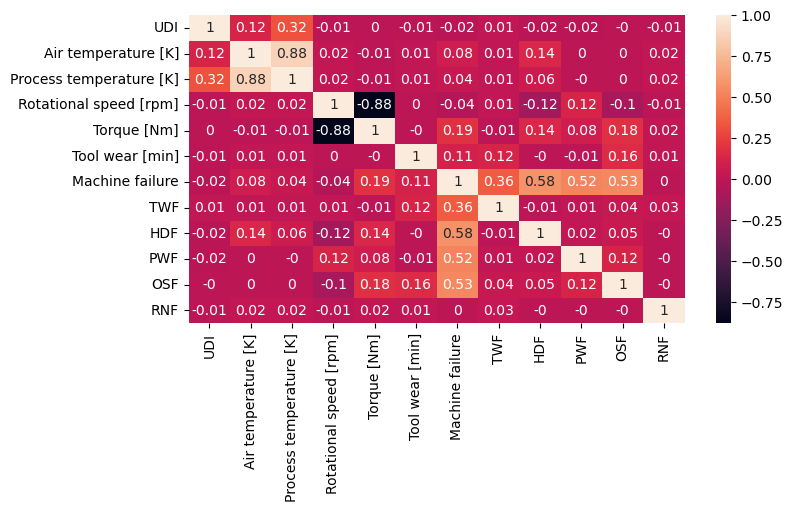

In [10]:
plt.figure(figsize=(8,4))
sns.heatmap(data.corr().round(2), annot=True)

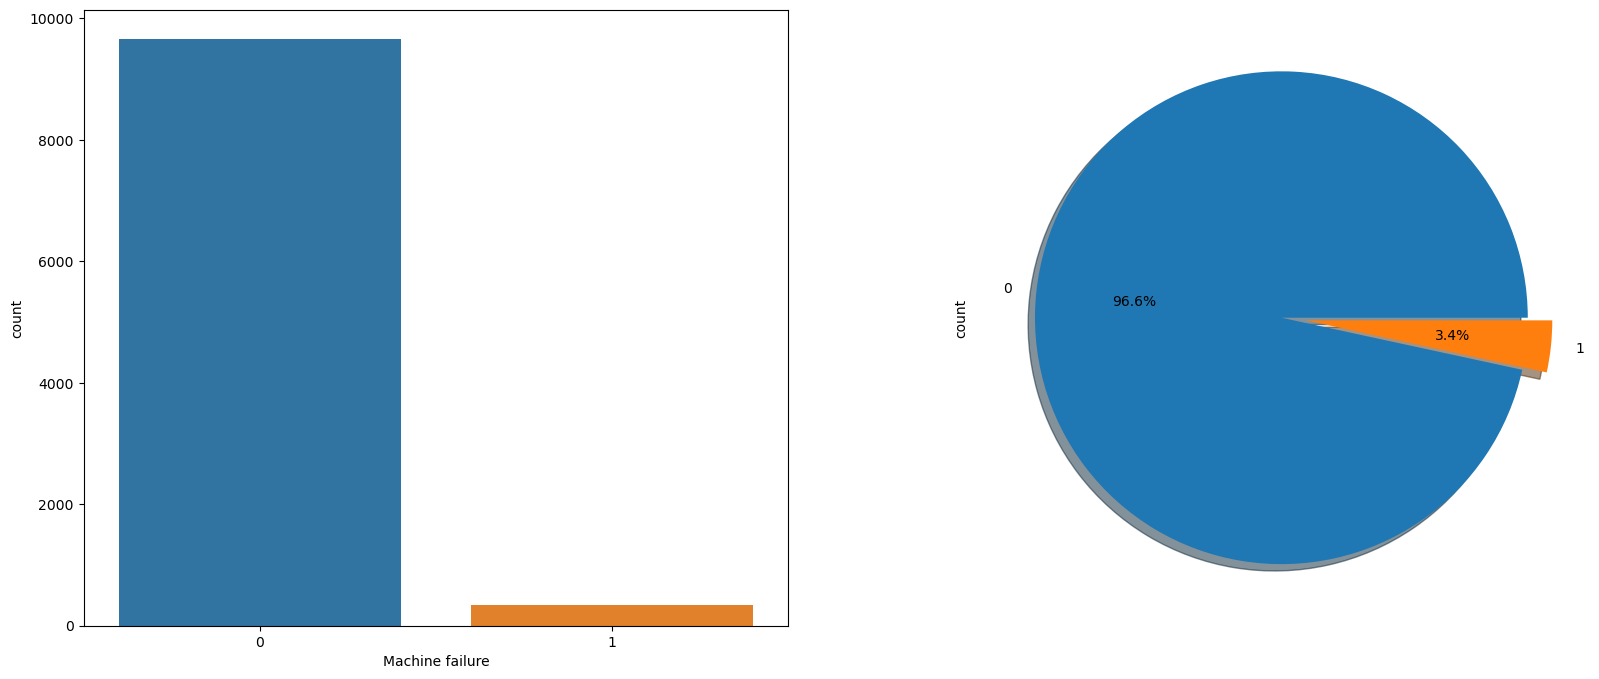

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.countplot(data=df, x="Machine failure", ax=ax[0])
df["Machine failure"].value_counts().plot.pie(ax=ax[1], shadow=True, explode=[0, 0.1], autopct="%1.1f%%")

plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


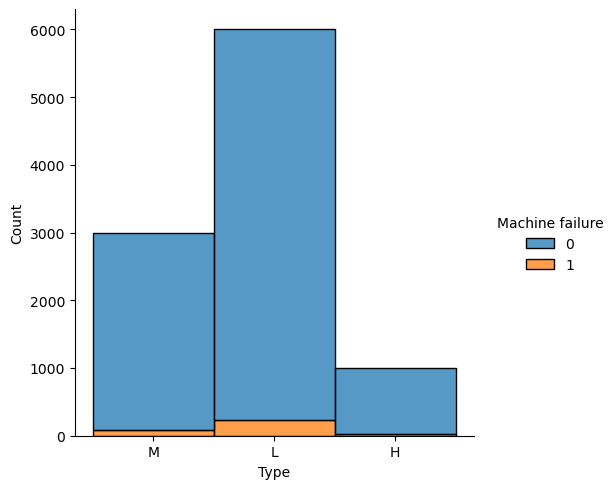

In [12]:
sns.displot(df,x='Type',hue='Machine failure', multiple="stack")

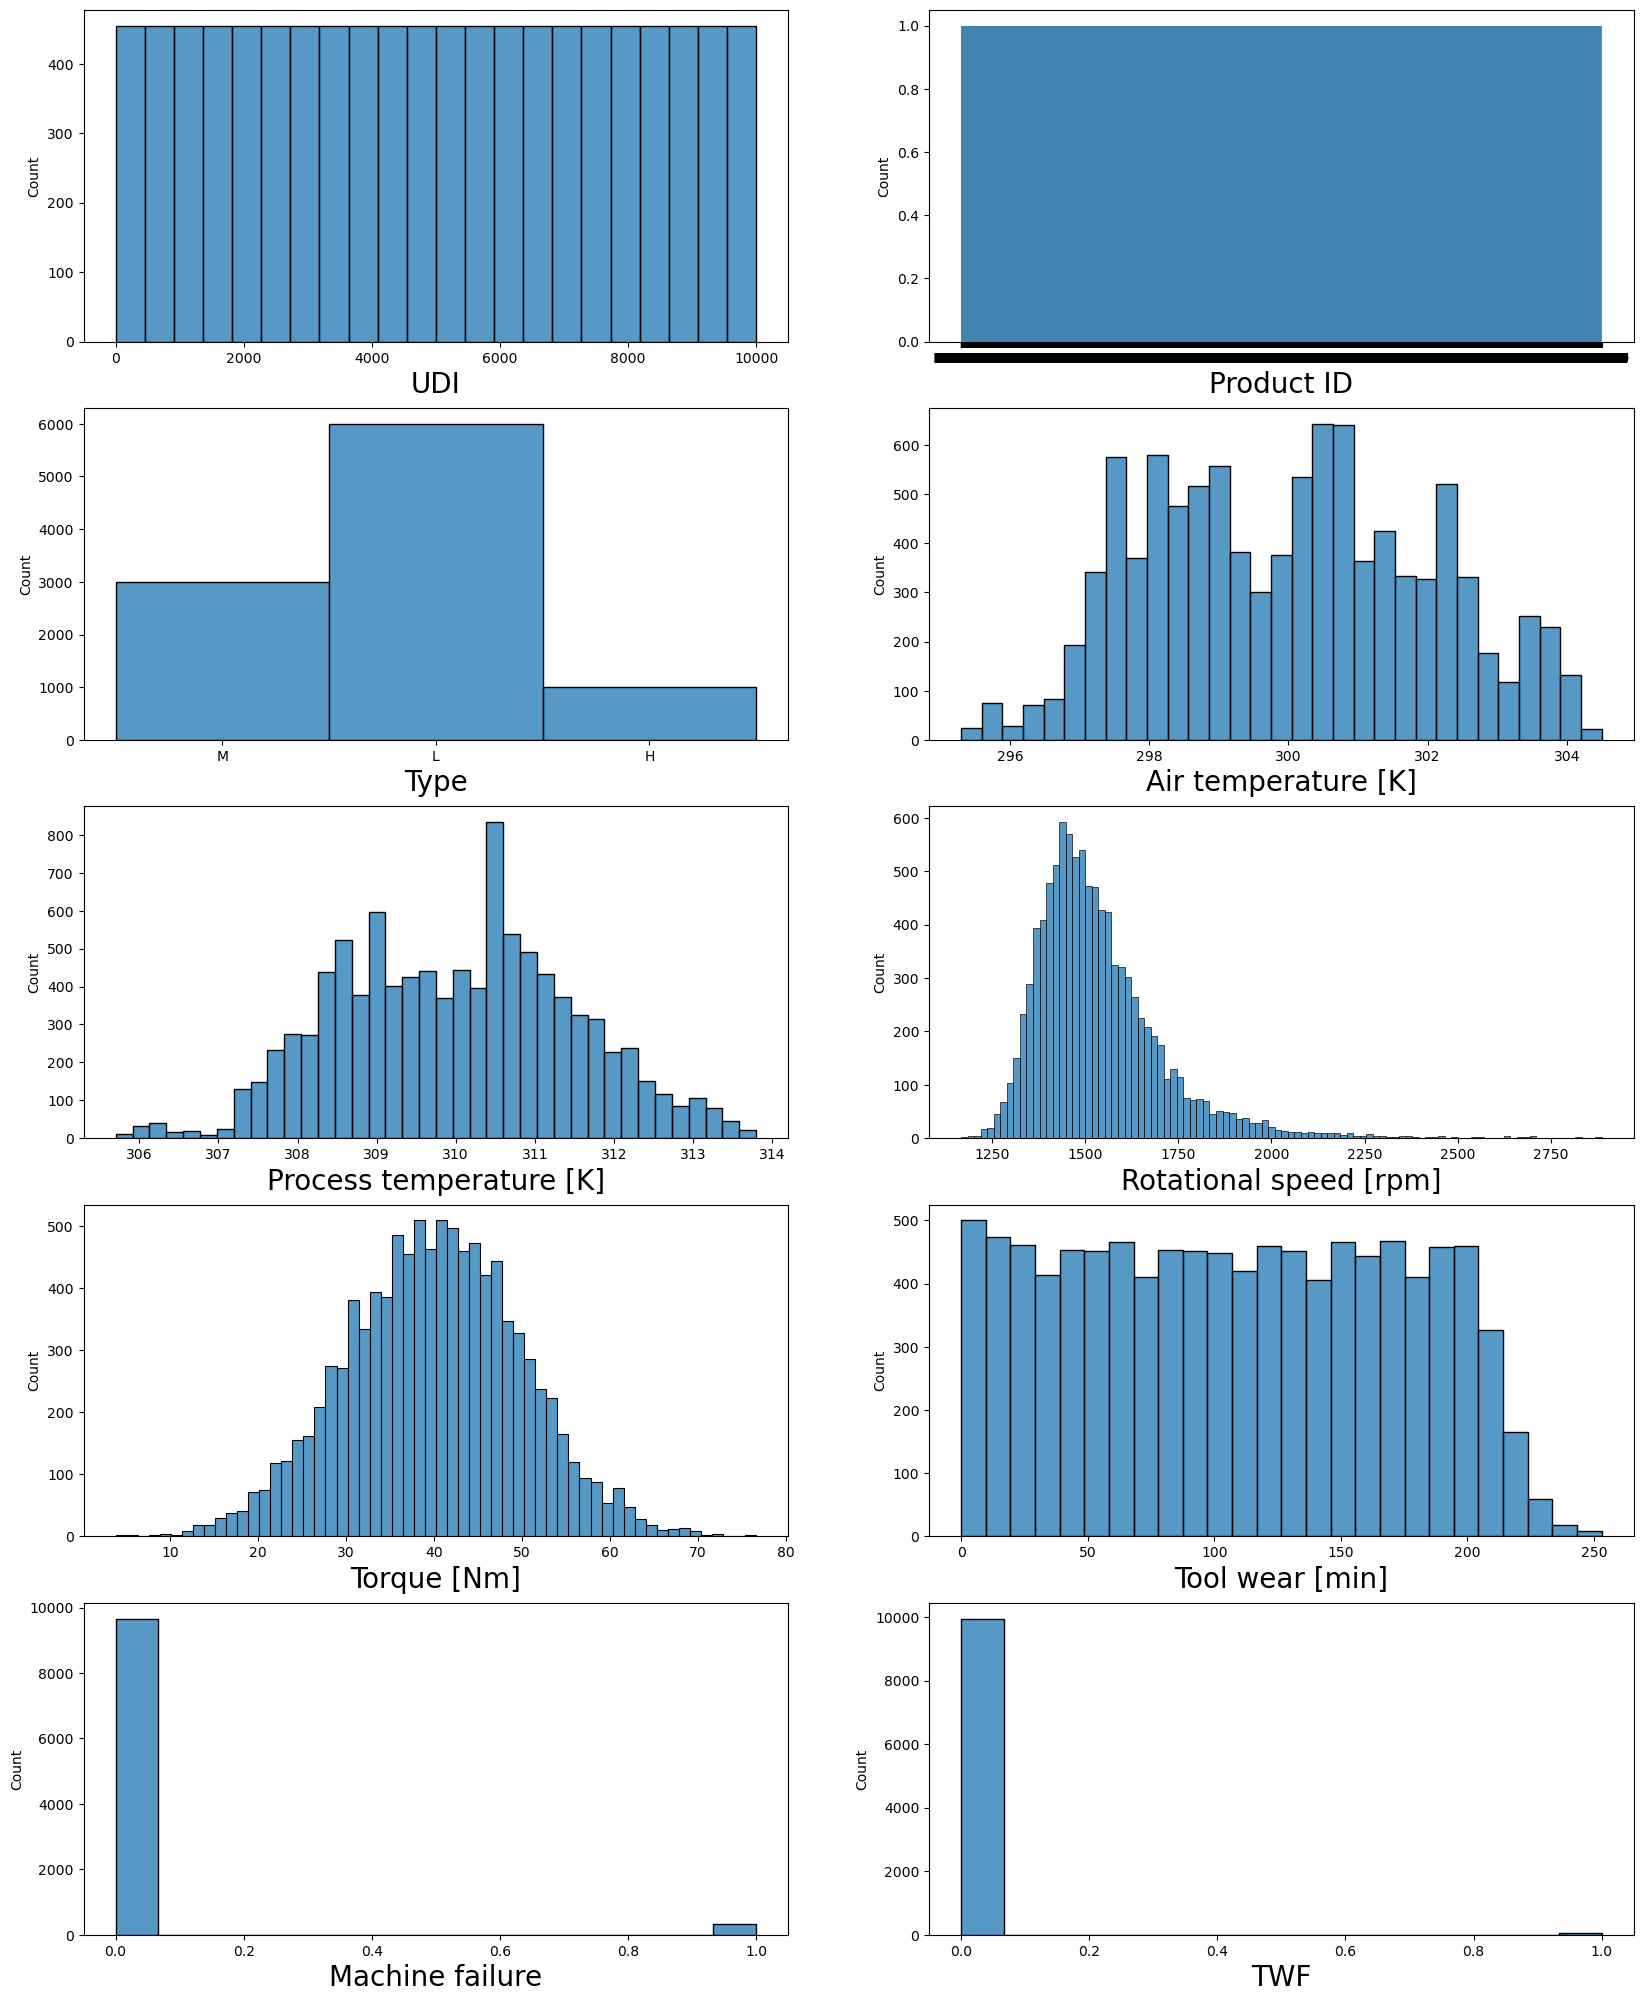

In [13]:
plt.figure(figsize=(20,25), facecolor='white')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas 


for column in df.columns: # iteration of columns / acessing the columns from  dataset 
    if plotnumber<=10 :     # as there are 10 columns in the data
        ax = plt.subplot(5,2,plotnumber)# plotting 10 graphs (5-rows,2-columns) ,plotnumber is for count  
        sns.histplot(x=df[column]) ## it give frequency hue =value counts
        plt.xlabel(column,fontsize=20) #assigning name to x-axis and "name" font size is 20
        
    plotnumber+=1 # increment of plotnumber 
plt.show()# to show gra


In [14]:
df_failed=df[df['Machine failure']==1]
df_failed

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,0,0,1,1,0
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,1,0,0,0,0
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,0,0,0,1,0
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,1,0,0,0,0
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,0,0,1,0,0
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,0,0,0,1,0
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,0,0,0,1,0


Type: consisting of a letter L, M, or H for low, medium and high as product quality variants.

air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K.

process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.

rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise.

torque [Nm]: torque values are normally distributed around 40 Nm with a Ïƒ = 10 Nm and no negative values.

tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.

machine failure: whether the machine has failed in this particular datapoint for any of the following failure modes are true.

The machine failure consists of five independent failure modes
Tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 ~ 240 mins.

heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air and process temperature is below 8.6 K and the rotational speed is below 1380 rpm.

power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails.

overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain.

random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters.

In [15]:
df.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Machine failure                2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64

In [16]:
df['Type'].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

In [17]:
pd.crosstab(df['Type'], df['Machine failure'])

Machine failure,0,1
Type,,
H,982,21
L,5765,235
M,2914,83


In [18]:
df_notfailed=df[df['Machine failure']==0]
df_notfailed

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


<Axes: xlabel='Air temperature [K]', ylabel='Process temperature [K]'>

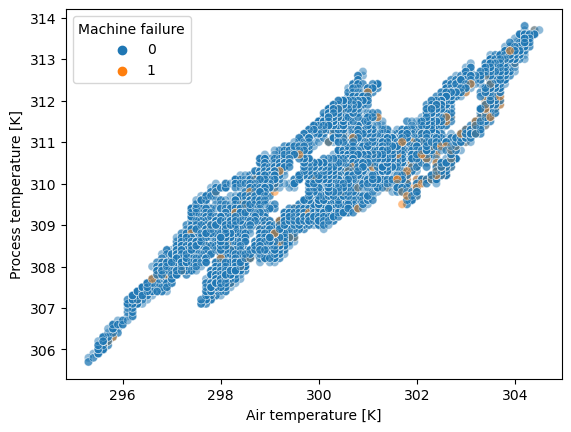

In [19]:
_mn = min(df['Air temperature [K]'].min(), df['Process temperature [K]'].min())
_mx = max(df['Air temperature [K]'].max(), df['Process temperature [K]'].max())
sns.scatterplot(x=df['Air temperature [K]'], y=df['Process temperature [K]'], hue=df["Machine failure"], alpha=.5)
# plt.xlim(_mn-1, _mx+1)
# plt.ylim(_mn-1, _mx+1)

 Air temperature [K] and Process temperature [K] has linear relation

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


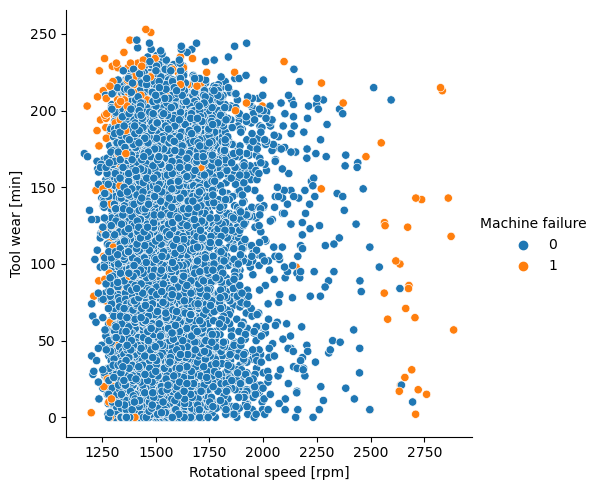

In [20]:
sns.relplot(y='Tool wear [min]', x='Rotational speed [rpm]',hue="Machine failure", data=df)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


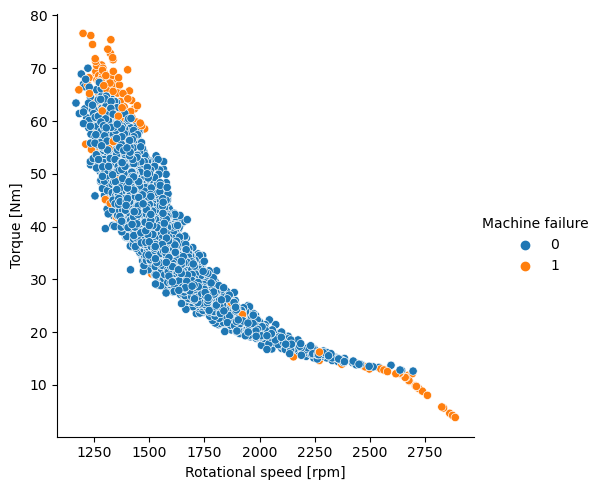

In [21]:
sns.relplot(y='Torque [Nm]', x='Rotational speed [rpm]', hue="Machine failure", data= df)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


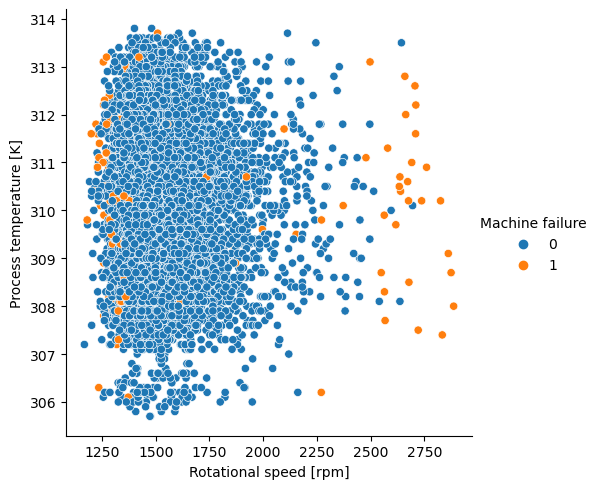

In [22]:
sns.relplot(y='Process temperature [K]', x = 'Rotational speed [rpm]', hue = "Machine failure", data = df)

In [23]:
from scipy.stats import chi2_contingency


H _ 0 : µ _ 1 = µ _ 2 ("there is no relationship between Type and machine failure")
H _ 1 : µ _ 1 ≠ µ _ 2 ("there is relationship between proccess temperature (K) and air temperature (K)")

In [24]:
# Create a contingency table of observed frequencies
contingency_table = pd.crosstab(df['Type'], df['Machine failure'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square test results:")
print("Chi-square statistic:", chi2)
print("P-value:", p)

Chi-square test results:
Chi-square statistic: 13.75171680114931
P-value: 0.0010324110359454081


Since the p-value is less than the typical significance level of 0.05, we reject the null hypothesis and conclude that there is a significant association between the type of machine and machine failure.

This suggests that the type of machine may influence the likelihood of machine failure.

# Modelling

In [69]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df, test_size=0.20, random_state=40)

In [70]:
df.shape

(10000, 14)

In [71]:
train.shape

(8000, 14)

In [72]:
test.shape

(2000, 14)

In [73]:
train['Type'].unique()

array(['L', 'H', 'M'], dtype=object)

In [74]:
train['Type'].value_counts()

Type
L    4794
M    2402
H     804
Name: count, dtype: int64

In [75]:
train.groupby(['Type'])['Machine failure'].mean()

Type
H    0.022388
L    0.038381
M    0.029142
Name: Machine failure, dtype: float64

In [76]:
train['Type'] = train['Type'].replace(['M','L','H'], [1,2,3])

In [77]:
test['Type'] = test['Type'].replace(['M','L','H'], [1,2,3])

In [78]:
test

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
293,294,H29707,3,298.1,308.5,1392,44.8,111,0,0,0,0,0,0
1244,1245,L48424,2,297.1,308.4,1726,28.4,202,0,0,0,0,0,0
7353,7354,L54533,2,299.8,310.3,1687,30.4,33,0,0,0,0,0,0
5145,5146,L52325,2,304.5,313.7,1670,32.9,7,0,0,0,0,0,0
1618,1619,L48798,2,297.9,307.8,1286,59.5,55,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5361,5362,L52541,2,303.3,312.7,1643,30.7,142,0,0,0,0,0,0
7365,7366,L54545,2,299.6,310.1,2057,20.4,60,0,0,0,0,0,0
1162,1163,L48342,2,296.9,307.8,1400,57.1,202,1,0,0,0,1,0
9434,9435,L56614,2,298.0,308.6,1626,33.3,50,0,0,0,0,0,0


In [83]:
X = df.drop(columns=["Machine failure","Product ID", "Type", "UDI", "TWF", "HDF", "PWF", "OSF", "RNF",'Tool wear [min]'])
X

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm]
0,298.1,308.6,1551,42.8
1,298.2,308.7,1408,46.3
2,298.1,308.5,1498,49.4
3,298.2,308.6,1433,39.5
4,298.2,308.7,1408,40.0
...,...,...,...,...
9995,298.8,308.4,1604,29.5
9996,298.9,308.4,1632,31.8
9997,299.0,308.6,1645,33.4
9998,299.0,308.7,1408,48.5


In [84]:
Y = df["Machine failure"]

In [85]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Machine failure, dtype: int64

In [86]:
X['Type'] = X['Type'].replace(['M','L','H'], [1,2,3])

KeyError: 'Type'

In [87]:
X

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm]
0,298.1,308.6,1551,42.8
1,298.2,308.7,1408,46.3
2,298.1,308.5,1498,49.4
3,298.2,308.6,1433,39.5
4,298.2,308.7,1408,40.0
...,...,...,...,...
9995,298.8,308.4,1604,29.5
9996,298.9,308.4,1632,31.8
9997,299.0,308.6,1645,33.4
9998,299.0,308.7,1408,48.5


In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=40)

In [89]:
from sklearn.linear_model import LogisticRegression, Ridge,Lasso
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [90]:
y_pred=lg.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy for the model is:",accuracy_score(y_pred,y_test))
report=classification_report(y_pred,y_test)
print(report)
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy for the model is: 0.9713333333333334
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2974
           1       0.21      0.81      0.33        26

    accuracy                           0.97      3000
   macro avg       0.60      0.89      0.66      3000
weighted avg       0.99      0.97      0.98      3000

[[2893    5]
 [  81   21]]


Accuracy: 0.9713
Accuracy is the ratio of correctly predicted instances to the total instances. In this case, the model has an accuracy 97%, which is very high. This indicates that the model is performing well in terms of overall correct predictions.

The confusion matrix provides a breakdown of correct and incorrect predictions for each class.
In this case, the matrix shows that the majority of instances (2893 out of 2974) for class 0 were correctly predicted, and most instances (21 out of 26) for class 1 were correctly predicted.

In [100]:
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength with the 'alpha' parameter
ridge_model.fit(X_train, y_train)

# Create and train a Lasso regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the regularization strength with the 'alpha' parameter
lasso_model.fit(X_train, y_train)

Lasso()

In [101]:
#checking model score by using ridge and lasso
ridge_score = ridge_model.score(X_test, y_test)
print("Ridge Model Score:", ridge_score)

# Check the model score for Lasso
lasso_score = lasso_model.score(X_test, y_test)
print("Lasso Model Score:", lasso_score)

Ridge Model Score: 0.12892493551280815
Lasso Model Score: 0.0010039764209262003


In [102]:
from sklearn.metrics import r2_score, mean_squared_error

# Make predictions on the test set
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)

# Calculate R2 score
ridge_r2 = r2_score(y_test, ridge_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
# Calculate mean squared error (MSE)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)

In [103]:
# Print the scores
print("Ridge R2 Score:", ridge_r2)
print("Lasso R2 Score:", lasso_r2)
print("Ridge MSE:", ridge_mse)
print("Lasso MSE:", lasso_mse)

Ridge R2 Score: 0.12892493551280815
Lasso R2 Score: 0.0010039764209262003
Ridge MSE: 0.02860958941801733
Lasso MSE: 0.0328110253984311


WORK ON THIS!!!

-squared (R^2) Score:
Ridge R2 Score: 0.999747742679691
Lasso R2 Score: 0.0055536289941965356
R-squared is a statistical measure of how well the regression model approximates the real data. It ranges from 0 to 1, with 1 indicating a perfect fit.

The Ridge R2 Score is very close to 1, suggesting that the Ridge regression model fits the data extremely well. It explains a very high percentage of the variance in the target variable.
The Lasso R2 Score is very low, close to 0. This suggests that the Lasso regression model does not fit the data well and may not capture much of the variance in the target variable.

Mean Squared Error (MSE):
Ridge MSE: 8.285139428229856e-06
Lasso MSE: 0.032661596609314614
MSE measures the average squared difference between actual and predicted values. It provides an absolute measure of how well the model is performing, with lower values indicating better performance.

The Ridge MSE is extremely small, close to zero. This suggests that the Ridge regression model has very low error, meaning the predicted values are very close to the actual values.
The Lasso MSE is relatively higher, indicating a higher level of error compared to the Ridge model. The predicted values from the Lasso model are further away from the actual values.
In summary, based on these results:

The Ridge regression model seems to be an excellent fit for the data, explaining a high percentage of variance with very low error.
The Lasso regression model, on the other hand, does not perform well on this dataset, as evidenced by its low R2 Score and higher MSE.

In [104]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [105]:
#testing data
y_pred_dt=dt.predict(X_test)

In [106]:
print("Accuracy with Decision tree model is:",accuracy_score(y_pred_dt,y_test))

Accuracy with Decision tree model is: 0.9623333333333334


WORK ON THIS

An accuracy of 1.0 (or 100%) with a Decision Tree model suggests that the model is making perfect predictions on the dataset it was trained on. This means that every instance in the dataset is correctly classified by the model.

While achieving 100% accuracy may sound impressive, it's crucial to consider the context and potential issues:

Overfitting: A Decision Tree model might have memorized the training data and overfitted to it. This means that the model has learned the noise in the training data rather than the underlying patterns, and it might not generalize well to new, unseen data.

Data Quality: Perfect accuracy could also be an indicator that there's an issue with the data, such as data leakage or an error in the dataset. It's essential to ensure that the model is evaluated on a separate, unseen dataset to assess its generalization performance.

Class Imbalance: If the dataset has imbalanced classes (one class significantly more prevalent than the other), a model might achieve high accuracy by simply predicting the majority class.

In [107]:
#calculate the probability fuction for testing data
proba_dt = dt.predict_proba(X_test)
print(proba_dt)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [108]:
X.keys()

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]'],
      dtype='object')

In [109]:
X.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm]
0,298.1,308.6,1551,42.8
1,298.2,308.7,1408,46.3
2,298.1,308.5,1498,49.4
3,298.2,308.6,1433,39.5
4,298.2,308.7,1408,40.0


In [110]:
#now we will see the perfomance of decision tree model by giving some input sample values
sample=[[308,303,1600,59]]
predictions=dt.predict(sample)
predictions
#The Model predicting the input samples for failure of machine which associated with value 1.

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

[Text(0.7112818465749579, 0.9807692307692307, 'x[3] <= 60.65\ngini = 0.065\nsamples = 7000\nvalue = [6763, 237]'),
 Text(0.48278267125210556, 0.9423076923076923, 'x[2] <= 2544.5\ngini = 0.049\nsamples = 6863\nvalue = [6692, 171]'),
 Text(0.4782908127456485, 0.9038461538461539, 'x[2] <= 1380.5\ngini = 0.043\nsamples = 6843\nvalue = [6692, 151]'),
 Text(0.19336047164514317, 0.8653846153846154, 'x[0] <= 301.55\ngini = 0.204\nsamples = 850\nvalue = [752, 98]'),
 Text(0.14752947782144862, 0.8269230769230769, 'x[1] <= 311.65\ngini = 0.054\nsamples = 646\nvalue = [628, 18]'),
 Text(0.11538461538461539, 0.7884615384615384, 'x[0] <= 299.25\ngini = 0.044\nsamples = 618\nvalue = [604.0, 14.0]'),
 Text(0.08253790005614824, 0.75, 'x[1] <= 310.15\ngini = 0.068\nsamples = 371\nvalue = [358, 13]'),
 Text(0.043795620437956206, 0.7115384615384616, 'x[3] <= 52.45\ngini = 0.05\nsamples = 353\nvalue = [344, 9]'),
 Text(0.017967434025828188, 0.6730769230769231, 'x[0] <= 297.45\ngini = 0.021\nsamples = 190\n

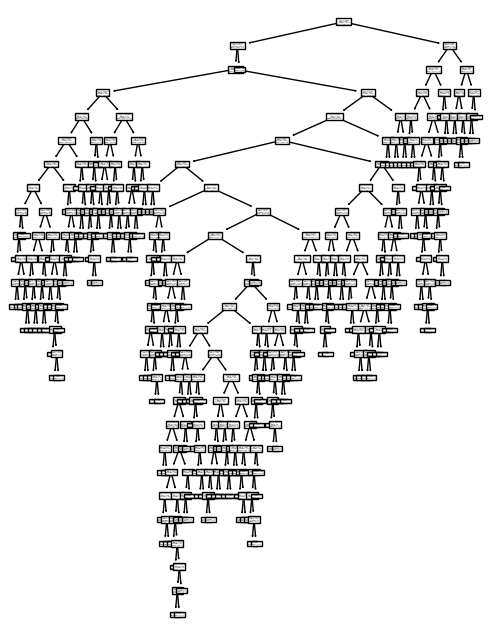

In [111]:
# Plot the decision tree
from sklearn import tree
fig, ax = plt.subplots(figsize=(6, 8))
tree.plot_tree(dt)

In [112]:
from sklearn.svm import SVC
svc_model=SVC(gamma=100)
#training model with support vector classifier
svc_model.fit(X_train,y_train)

SVC(gamma=100)

In [113]:
#making preditions on testin data
y_pred_svc=svc_model.predict(X_test)

In [114]:
print("Accuracy of SVC model:",accuracy_score(y_test,y_pred_svc)*100)
print("classification report for svc model",classification_report(y_test,y_pred_svc))

Accuracy of SVC model: 96.6
classification report for svc model               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2898
           1       0.00      0.00      0.00       102

    accuracy                           0.97      3000
   macro avg       0.48      0.50      0.49      3000
weighted avg       0.93      0.97      0.95      3000



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 96.6%

Accuracy is the ratio of correctly predicted instances to the total instances. In this case, the model has an accuracy of 96.6%, which is quite high.
The precision, recall, and F1-Score for class 1 are all 0.00, indicating that the model is not effectively identifying instances of class 1. This could be due to a class imbalance issue or other challenges with the dataset.

In practical terms, achieving a high accuracy is good, but it's crucial to examine class-specific metrics, especially when dealing with imbalanced datasets. It might be worth exploring techniques like adjusting class weights, tuning hyperparameters, or using different algorithms to improve the performance on the minority class.

In [115]:
#test the predictions on input samples for svc model
sample=[[0.2,3.6,2,4]]
predictions=svc_model.predict(sample)
predictions
#The model predicts for input samples is machine will not be fail.so it showing us 0.

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

So far, We have created the Logistic Regression model and also done the regularization with lasso and ridge. Then we creadted the Decision tree model for data and then we create the Support vector Classifier model and also evaluate the performance of data.

In [116]:
pip install joblib

In [117]:
import joblib

# Assume your model is stored in a variable called 'model'
lg.fit(X_train, y_train)  # Train your model

# Save the model to a file (adjust the filename as needed)
joblib.dump(lg, 'machine_failure_lg.joblib')

['machine_failure_lg.joblib']

In [118]:
# Assume your model is stored in a variable called 'model'
svc_model.fit(X_train, y_train)  # Train your model

# Save the model to a file (adjust the filename as needed)
joblib.dump(svc_model, 'machine_failure_svc.joblib')

['machine_failure_svc.joblib']

In [119]:
# Assume your model is stored in a variable called 'model'
dt.fit(X_train, y_train)  # Train your model

# Save the model to a file (adjust the filename as needed)
joblib.dump(dt, 'machine_failure_dt.joblib')

['machine_failure_dt.joblib']

In [120]:


loaded_model = joblib.load("FlaskDemo\machine_failure_lg.joblib")
joblib.dump(loaded_model, "FlaskDemo\machine_failure_lg_updated.joblib")

FileNotFoundError: [Errno 2] No such file or directory: 'FlaskDemo\\machine_failure_lg.joblib'

In [ ]:
# Load the model
loaded_model = joblib.load('machine_failure_lg.joblib')

# Now, you can use loaded_model for predictions
predictions = loaded_model.predict(X_test)

In [ ]:
sample=[[2,308,303,1600,59]]
predictions=loaded_model.predict(sample)
predictions

In [ ]:
pip install --user --upgrade scikit-learn==1.4.0

In [75]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Load your saved model
model = joblib.load("machine_failure_svc.pkl")

In [ ]:
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    features = data['features']  # Adjust this based on your input format

    prediction = model.predict(features)

    return jsonify({'prediction': prediction.tolist()})

In [ ]:
'UDI', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

In [98]:
pip install Flask

Note: you may need to restart the kernel to use updated packages.
